In [129]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [130]:
df = pd.read_csv('train.csv')
df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


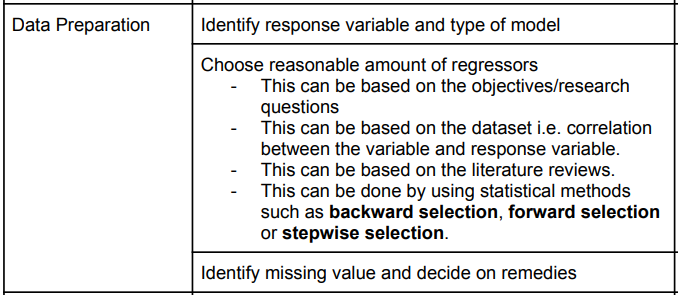

## <font color = yellow><b>II.) Data Preparation 

#### <font color = green|><b>1.) Indentify response variable and type of model

In general, the response variable is the variable that you want to predict or explain using other variables in the dataset. It is also known as the dependent variable or the target variable.

The type of model depends on the nature of the problem and the characteristics of the data. Here are a few examples:

- <font color = green|>Regression:</font> If the response variable is continuous or numerical, and you want to predict its value based on one or more predictor variables, you would typically use a regression model. Examples include <font color = yellow>linear regression, polynomial regression, or multiple regression.</font>

- <font color = green|>Classification:</font> If the response variable is categorical or binary (having two categories), and you want to classify or categorize new observations based on predictor variables, you would use a classification model. Examples <font color = yellow>include logistic regression, decision trees, random forests, or support vector machines.</font>

- <font color = green|>Time Series:</font> If the response variable is a sequence of observations recorded over time, and you want to model and forecast future values based on historical patterns, you would use a time series model. Examples include <font color = yellow>auto-regressive integrated moving average (ARIMA), exponential smoothing, or recurrent neural networks (RNN).</font>

- <font color = green|>Clustering:</font> If the goal is to group similar observations together based on their characteristics without having a specific response variable, you would use clustering algorithms. Examples include <font color = yellow>k-means clustering, hierarchical clustering, or DBSCAN.</font>

<b><font color = green|><p style = 'text-align:center'>The response variable is "satisfaction"

Since the response variable is to predict satisfaction or dissatisfaction, so we choose Classification model. Classification models are specifically designed to handle such scenarios where the response variable is categorical and you want to classify or predict the category of new observations.

Here are some commonly used classification models for predicting satisfaction or dissatisfaction:

- <font color = green|>Logistic Regression:</font> Logistic regression is a widely used classification model that models the relationship between the predictor variables and the probability of a binary outcome. It is often used when the relationship between the predictors and the response is expected to be linear.

- <font color = green|>Decision Trees:</font> Decision trees are a non-parametric classification model that recursively splits the data based on the predictor variables to create a tree-like structure. They are easy to interpret and can capture non-linear relationships in the data.

- <font color = green|>Random Forest:</font> Random forest is an ensemble method that combines multiple decision trees to make predictions. It is known for its robustness and ability to handle complex datasets.

- <font color = green|>Support Vector Machines (SVM):</font> SVM is a powerful classification model that aims to find the optimal hyperplane that separates the data into different classes. It can handle both linear and non-linear relationships through the use of kernel functions.

These are just a few examples, and there are other classification models available as well. The choice of the specific model depends on various factors such as the size and characteristics of the dataset, the interpretability requirements, and the desired performance. It is often beneficial to experiment with multiple models and evaluate their performance using appropriate metrics before making a final choice.

<b><font color = green|><p style = 'text-align:center'>The type of model is "Classification"

#### <font color = green|><b>2.) Choose reasonable amount of regressors 

<font color = yellow>a.) Objective/Research questions

The objective of this project is to predict the target variable satisfaction which classifying into two type of result such that satisfaction or dissatisfaction by using any predictor variables that has interconnected to each other. This project also help to notice the main factor that make effect to customer's decission and find the solution to solve and improve the performance of the main services or factors to be more efficiency. On the other hand, we have also checked the predictor variables that has less interconnected to target and assume to removing from dataset or just keep the important predictors in dataset by using feature engineering process. 

<font color = yellow>b.) Correlation between predictor variable Vs response variable

In [131]:
df.corr()

C:\Users\LH\AppData\Local\Temp\ipykernel_12488\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.022929,0.095184,-0.021338,-0.001714,0.014119,-0.000427,0.001254,0.055394,0.053091,0.002592,0.055255,0.044459,0.075134,0.079346,0.079468,0.025313,-0.019321,-0.037254
Age,0.022929,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147
Flight Distance,0.095184,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426
Inflight wifi service,-0.021338,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095
Departure/Arrival time convenient,-0.001714,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864
Ease of Online booking,0.014119,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984
Gate location,-0.000427,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143
Food and drink,0.001254,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,-0.029983,-0.032524
Online boarding,0.055394,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.018515,-0.021949
Seat comfort,0.053091,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,-0.027323,-0.029900


<b><p style='text-align:center'><font color = green|>According to correlation matrix distribution, we see that the highest correlation coefficient is between "Arrival Delay in Minutes" Vs "Departure Delay in Minutes" existing valuable = 0.965481

<font color = yellow>c.) Literature reviews

Title: "Customer Satisfaction in Airline Industry: A Literature Review"

<font color = yellow>Introduction:</font>
The airline industry is highly competitive, and customer satisfaction plays a crucial role in determining the success and reputation of airlines. This literature review aims to explore the factors influencing customer satisfaction in the airline industry, focusing on the dataset comprising attributes related to the flight experience.

<font color = yellow>Methodology:</font>
A comprehensive search was conducted in academic databases, such as IEEE Xplore, ACM Digital Library, and Google Scholar, using keywords like "airline customer satisfaction," "flight experience," and "airline service quality." The search was limited to scholarly articles published in the last decade to ensure up-to-date information. Relevant research papers, conference proceedings, and books were selected for review.

<font color = yellow>Factors Influencing Customer Satisfaction:</font>

<font color = green|>Service Quality:</font> Several studies have emphasized the importance of service quality factors such as in-flight wifi service, departure/arrival time convenience, ease of online booking, gate location, food and drink service, online boarding, seat comfort, inflight entertainment, on-board service, legroom service, baggage handling, check-in service, inflight service, and cleanliness. These attributes significantly impact customer satisfaction and have been widely investigated in the literature.

<font color = green|>Flight Performance:</font> Departure delay in minutes and arrival delay in minutes are critical indicators of flight performance. Studies have shown that excessive delays can negatively affect customer satisfaction, leading to dissatisfaction and potential customer attrition.

<font color = green|>Age Demographics:</font> Age is an important demographic factor that can influence customer satisfaction. Research suggests that different age groups may have varying preferences and expectations regarding the flight experience. Understanding age-related differences can help airlines tailor their services to meet the specific needs of different customer segments.

<font color = green|>Customer Satisfaction Models:</font> Several customer satisfaction models, such as the Expectancy-Disconfirmation Model and the ServQual model, have been employed to study customer satisfaction in the airline industry. These models provide theoretical frameworks for understanding the relationship between service quality attributes and customer satisfaction.

<font color = green|>Conclusion:</font>
The literature review highlights the significance of customer satisfaction in the airline industry and identifies various factors that influence customer satisfaction. It provides insights into the specific attributes from the dataset that have been extensively studied in previous research. The findings underscore the importance of delivering high-quality services across multiple dimensions of the flight experience to enhance customer satisfaction and loyalty. Further research is warranted to investigate the interplay between these factors and develop more accurate predictive models for customer satisfaction in the airline industry.

<font color = green|>Note:</font> This is a hypothetical example of a literature review based on the given dataset attributes. In practice, conducting a comprehensive literature review involves reviewing a wide range of relevant sources and synthesizing the findings in a more detailed and comprehensive manner.

In [132]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

<font color = green|>d.) Statistical methods

To perform forward selection, backward selection, and stepwise selection on the dataset you provided, you need to define the target variable (satisfaction) and the predictor variables. Once you have done that, you can apply the following selection methods:

- Forward Selection: In forward selection, you start with an empty model and iteratively add predictors that improve the model's performance the most. Here's an example using Python's statsmodels library:

In [133]:
import statsmodels.api as sm

# Define the target variable and predictor variables
# Convert 'satisfaction' column to numerical values
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

target = df['satisfaction']
predictors = df[['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking']]

# Perform forward selection
selected_features = []
best_score = 0

while len(predictors.columns) > 0:
    remaining_features = list(set(predictors.columns) - set(selected_features))
    scores = []

    for feature in remaining_features:
        model = sm.Logit(target, sm.add_constant(predictors[selected_features + [feature]])).fit()
        scores.append((feature, model.aic))

    best_feature, best_score = min(scores, key=lambda x: x[1])
    selected_features.append(best_feature)

    if best_score > model.aic:
        break

# Print the selected features
print("Selected Features:", selected_features)

Optimization terminated successfully.
         Current function value: 0.682911
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.642666
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.674789
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.669381
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.638657
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.637511
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593198
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.632340
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578948
  

ValueError: min() arg is an empty sequence

The error suggests that the `scores` list is empty, indicating that no models were fit during the selection process. This can occur if the initial set of predictors (`remaining_features`) is empty or if the data is not properly prepared.

To resolve this issue, please ensure that you have properly defined the `remaining_features` list and that the data is in the correct format for model fitting. Also, make sure that the dataset has enough observations to perform model selection.

If you continue to encounter issues, please provide more details about the specific implementation and any additional code or error messages you are encountering.

- <font color = green|>Backward Elimination:</font> In backward elimination, you start with a model containing all predictors and iteratively remove the least significant predictor until you reach the desired model. Here's an example using Python's statsmodels library:

In [134]:
import statsmodels.api as sm

# Define the target variable and predictor variables
target = df['satisfaction']
predictors = df[['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking']]

# Perform backward elimination
selected_features = predictors.columns.tolist()

while len(selected_features) > 0:
    model = sm.Logit(target, sm.add_constant(predictors[selected_features])).fit()
    p_values = model.pvalues[1:]  # Exclude the constant term

    if p_values.max() > 0.05:  # Remove the least significant predictor
        selected_features.remove(p_values.idxmax())
    else:
        break

# Print the selected features
print("Selected Features:", selected_features)

Optimization terminated successfully.
         Current function value: 0.571108
         Iterations 6
Selected Features: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking']


- Stepwise Selection: Stepwise selection combines forward and backward selection by adding or removing predictors based on statistical criteria. Here's an example using Python's statsmodels library:

In [135]:
import statsmodels.api as sm

# Define the target variable and predictor variables
target = df['satisfaction']
predictors = df[['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking']]

# Perform stepwise selection
selected_features = predictors.columns.tolist()
best_score = 0

while len(selected_features) > 0:
    model = sm.Logit(target, sm.add_constant(predictors[selected_features])).fit()
    p_values = model.pvalues[1:]  # Exclude the constant term

    if p_values.max() > 0.05:  # Remove the least significant predictor
        selected_features.remove(p_values.idxmax())
    else:
        break

    if model.aic > best_score:
        selected_features.append(p_values.idxmax())  # Add the predictor back
        break
    else:
        best_score = model.aic

# Print the selected features
print("Selected Features:", selected_features)

Optimization terminated successfully.
         Current function value: 0.571108
         Iterations 6
Selected Features: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking']


#### <font color = green|><b>3.) Identify missing values and decide on remedies

For dataset, there exist just only 310 missing values of "Arrival Delay in Minutes" among the whole dataset with 103904 rows × 25 columns. So therefore, we decide to drop all of missing value because the the number or percentage of missing values for this feature is so smaller comparing to the whole row numbers of "Arrival Delay in Minute".

In [136]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## <font color = yellow><b>II.) EDA

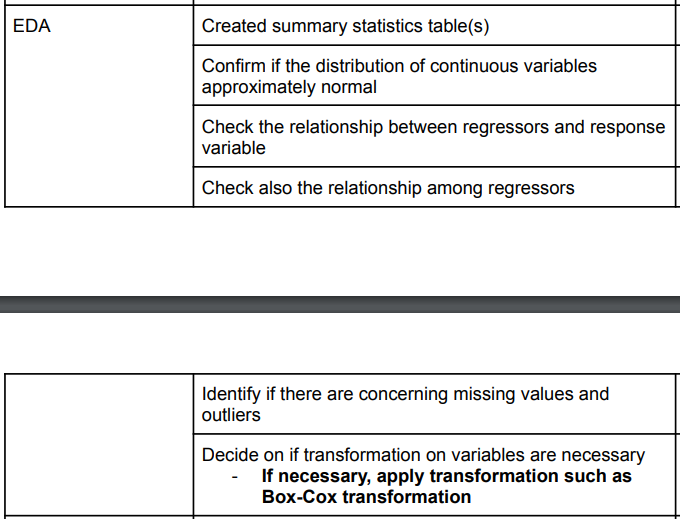

#### <font color = green|><b>1.) Crated summary statistics table(s)

In [137]:
statistical_table = df.describe()
statistical_table

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,0.433394
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.495546
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


#### <font color = green|><b>2.) Confirm if the distribution of conutinuous variables approximately normal

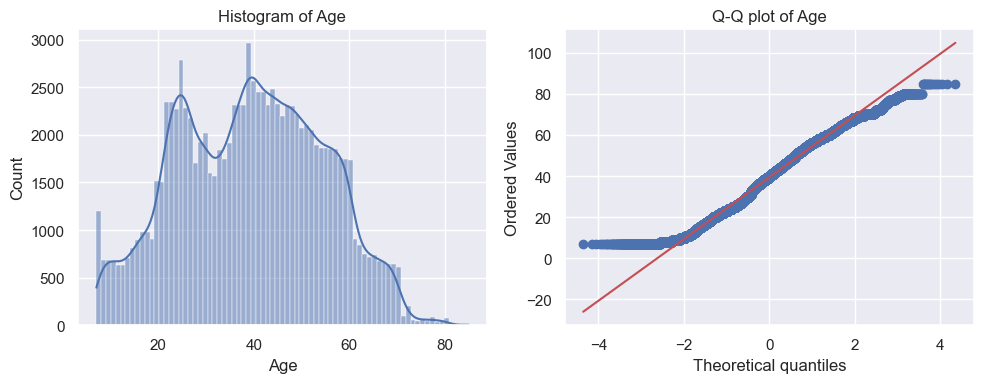

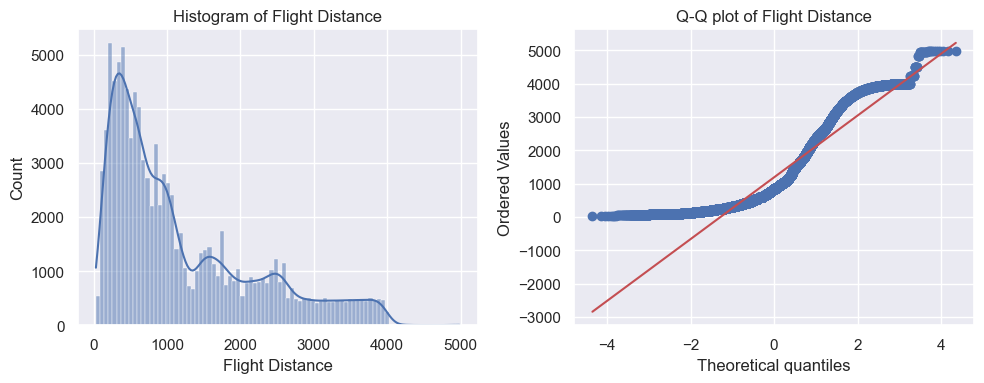

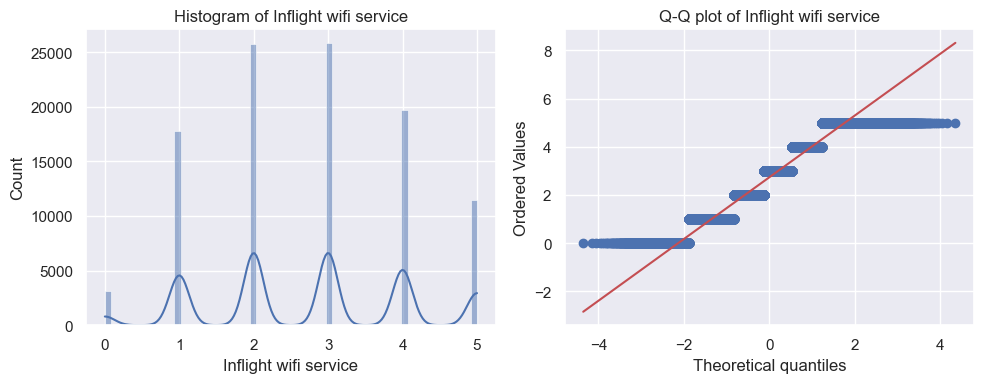

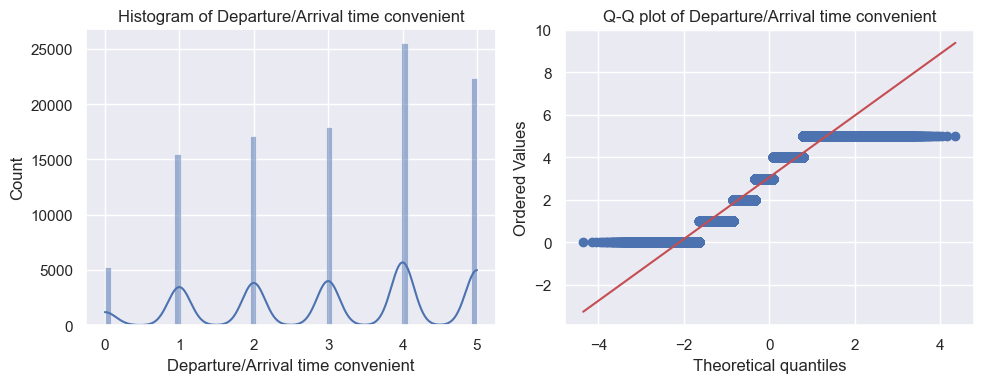

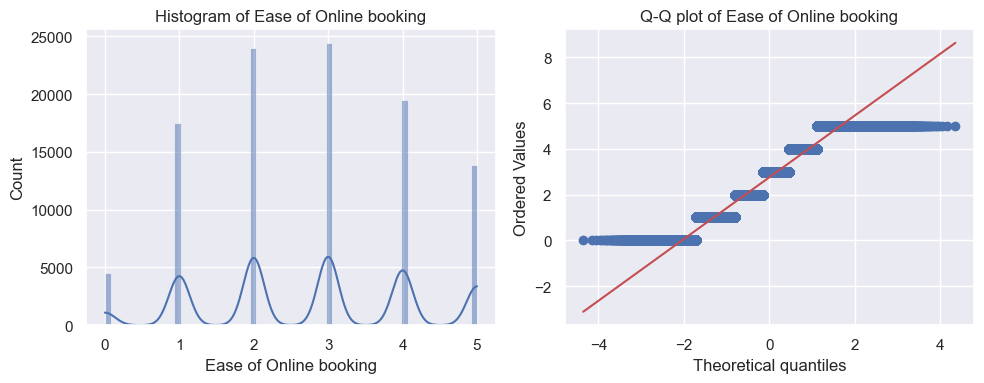

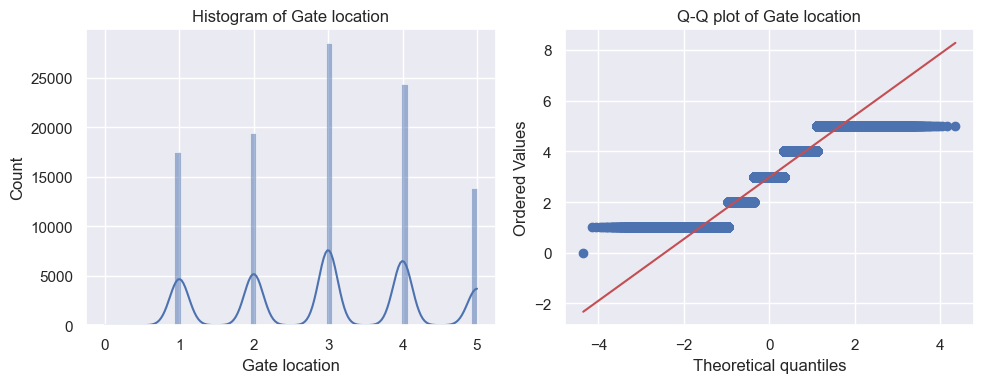

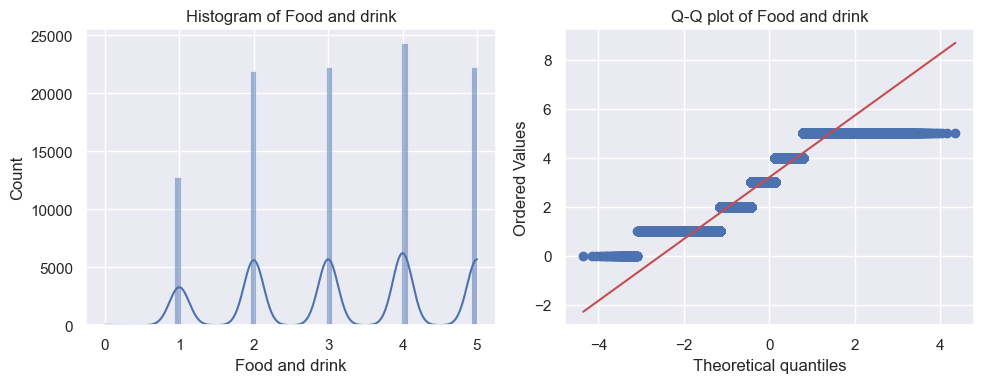

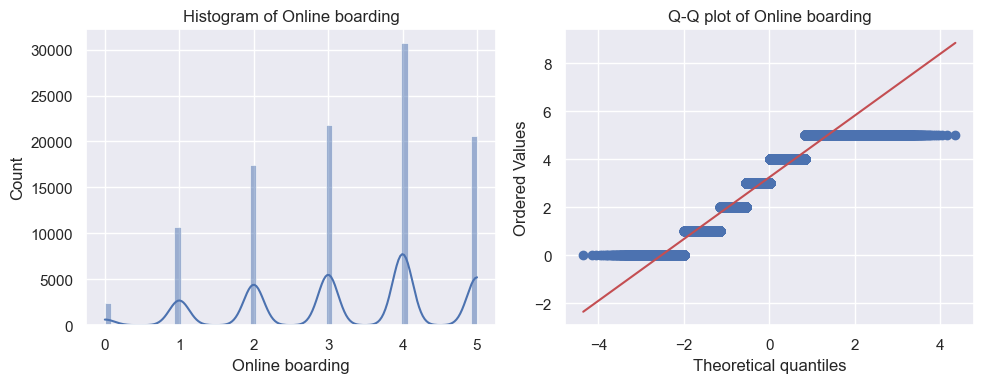

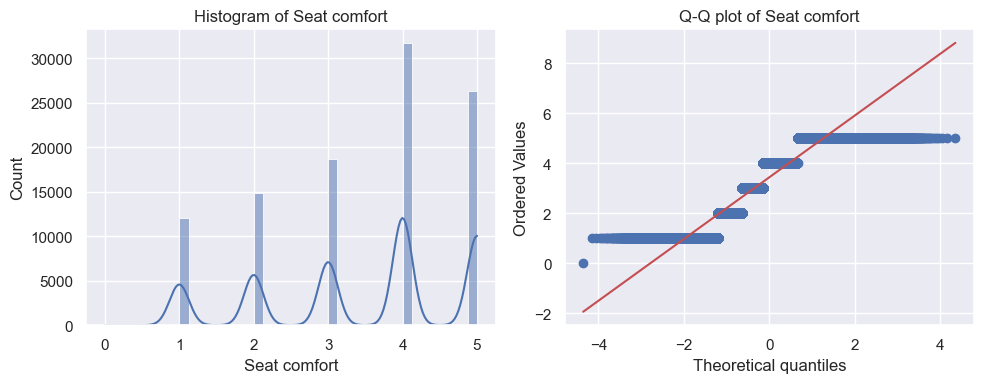

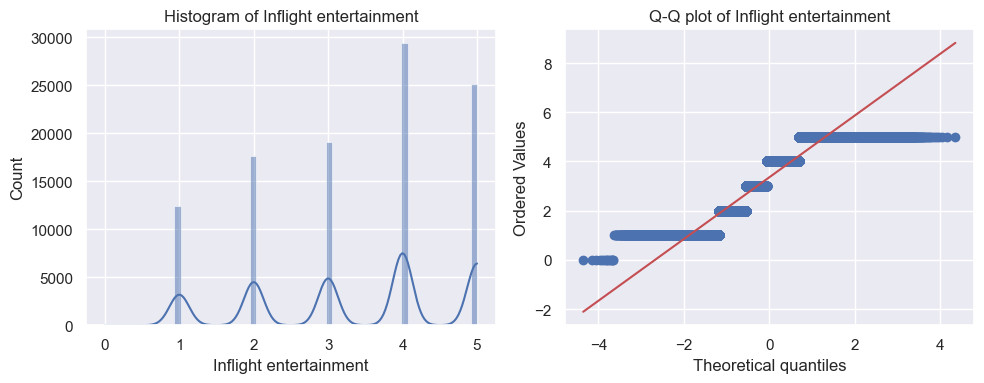

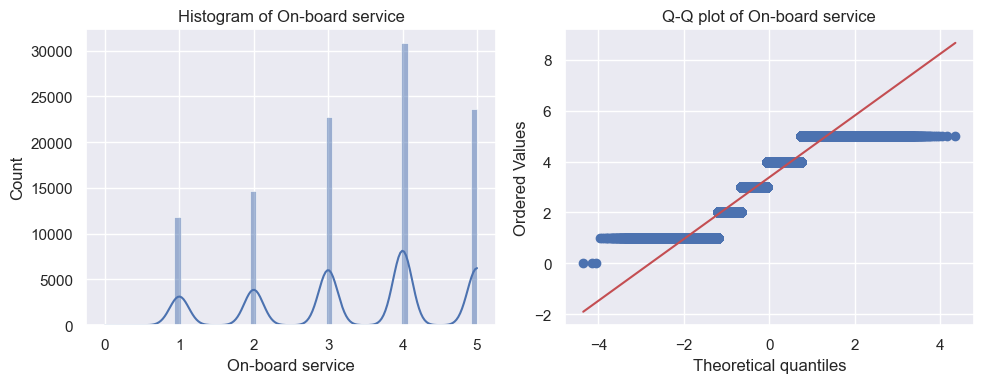

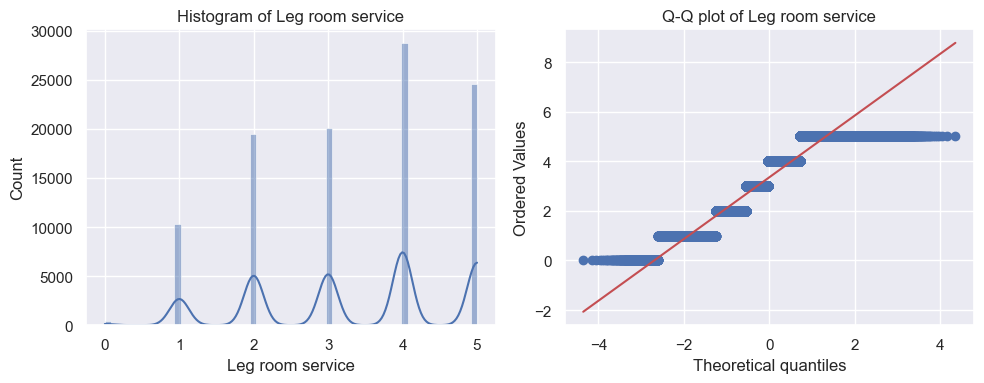

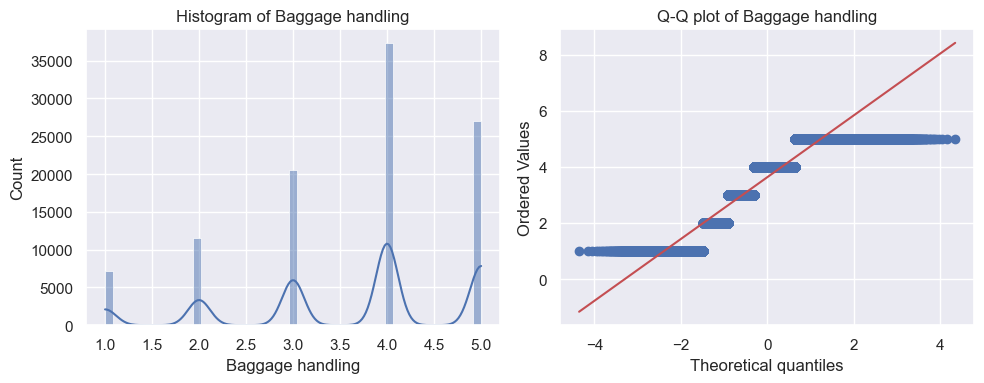

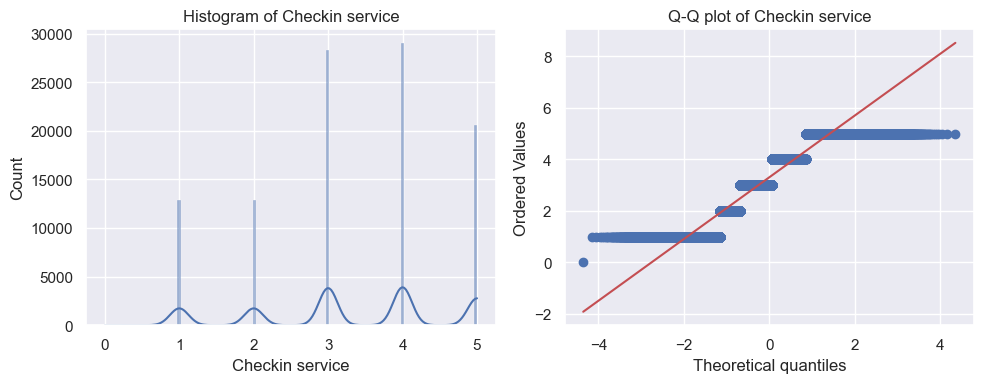

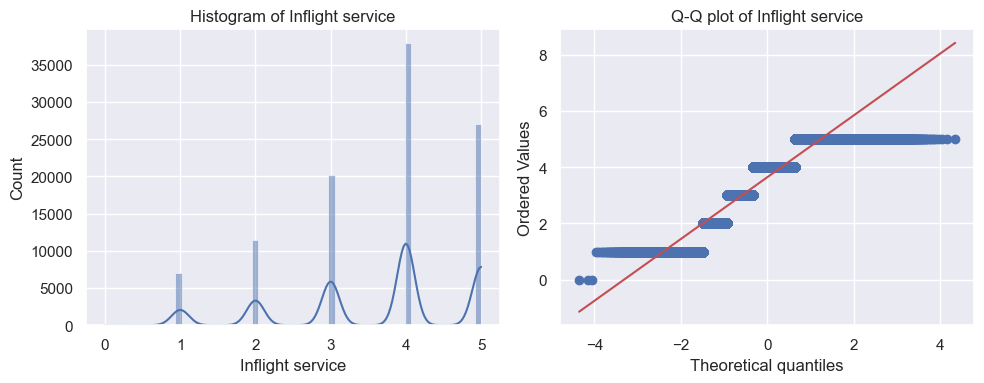

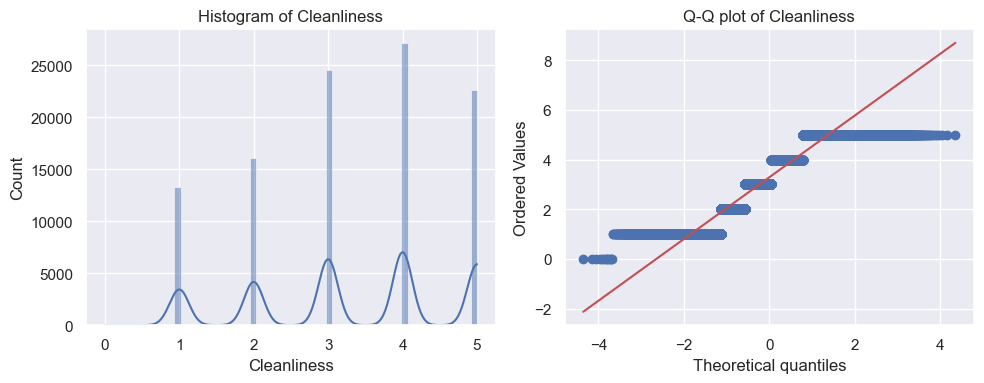

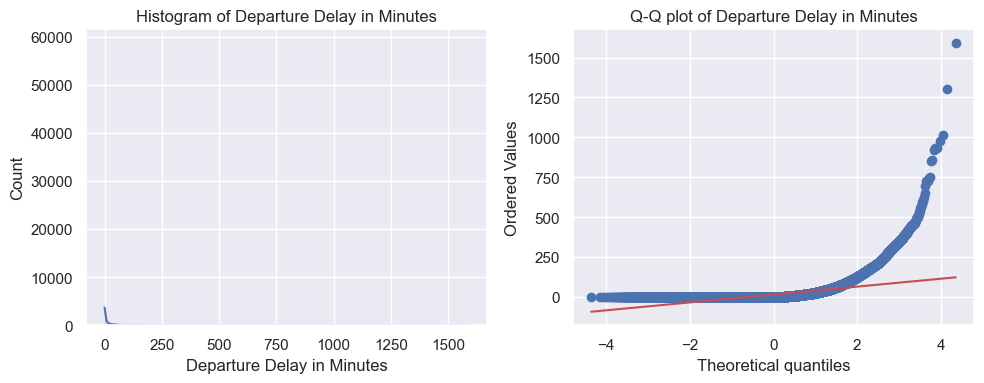

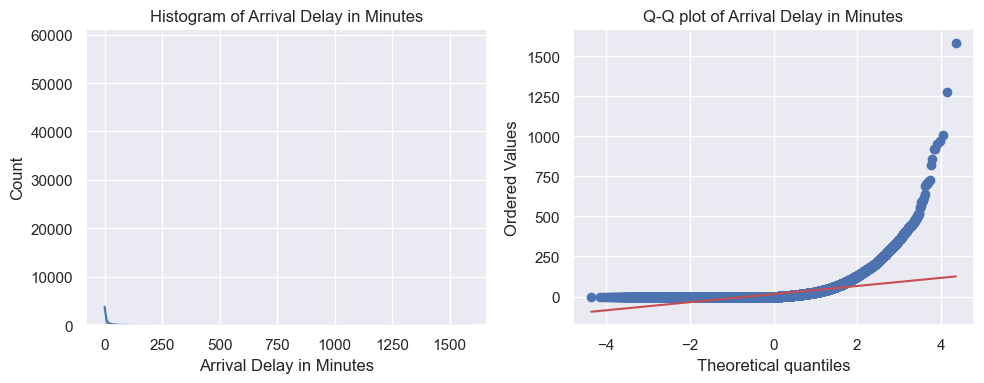

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select the continuous variables for analysis
continuous_vars = ['Age','Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Plot histograms and Q-Q plots for each continuous variable
for var in continuous_vars:
    # Plot histogram
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')

    # Plot Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.title(f'Q-Q plot of {var}')
    
    plt.tight_layout()
    plt.show()


<font color = green|><b><p style='text-align:center'>Based on the figures of graph visualization QQ-plot and histogram above, we see that "Age" and "Inflight Distance" are approximately normal

#### <font color = green|><b>3.) Check regressor and relationship between regressors and response variable 

In [178]:
df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,1


In [180]:
regressor = df.drop(columns=['satisfaction','id']).columns
regressor

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

<font color = yellow>a.) Satisfaction Vs Gender Visualization 

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import cm

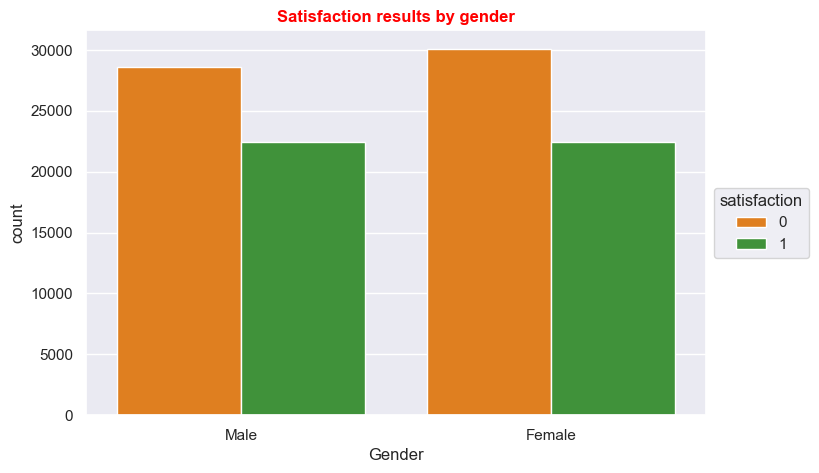

In [183]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Gender",data=df,hue="satisfaction",palette="Paired_r")

plt.title("Satisfaction results by gender",weight='bold',color='red')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="satisfaction")
plt.show()

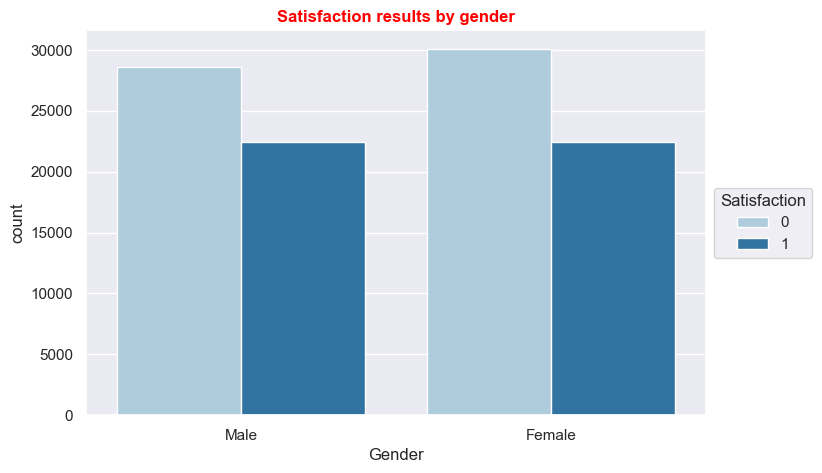

In [146]:
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")
sns.countplot(x="Gender", hue="satisfaction", data=df, palette="Paired")

plt.title("Satisfaction results by gender", weight='bold', color='red')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Satisfaction")
plt.show()


Both genders almost have equivalent ratio between satisfaction rating(satisfied Vs neutral or dissatisfied) 

<font color = yellow>b.) Satisfaction Vs Customer Type Visualization 

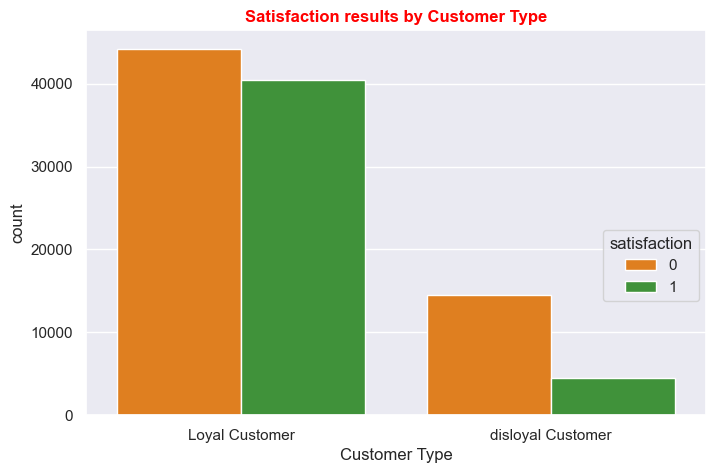

In [175]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Customer Type", data = df, hue ="satisfaction",palette ="Paired_r" )

plt.title("Satisfaction results by Customer Type",color='red',weight='bold')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
plt.show()

#### <font color = yellow>c.) Satisfaction Vs Class

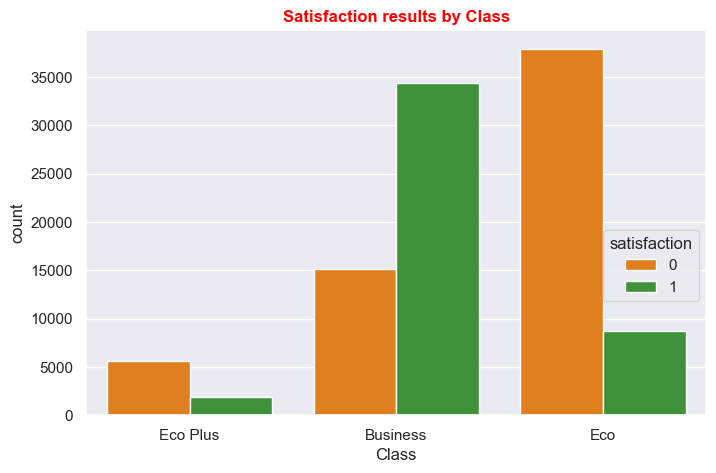

In [174]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Class", data = df, hue ="satisfaction",palette ="Paired_r" )

plt.title("Satisfaction results by Class",color='red',weight='bold')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
plt.show()

#### <font color = yellow>d.) Satisfaction Vs Type of Travel

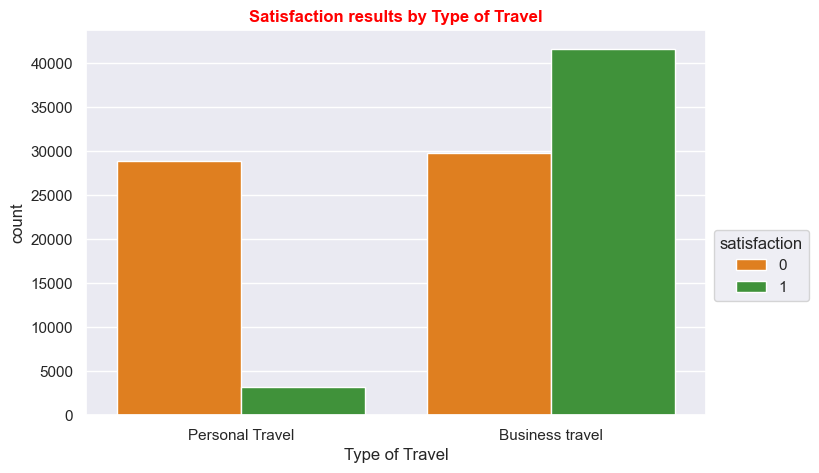

In [173]:
plt.figure(figsize = (8,5))
sns.countplot(x ="Type of Travel", data = df, hue ="satisfaction",palette ="Paired_r" )

plt.title("Satisfaction results by Type of Travel",color='red',weight='bold')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "satisfaction")
plt.show()

#### <font color = yellow>e.) Satisfaction Vs Age

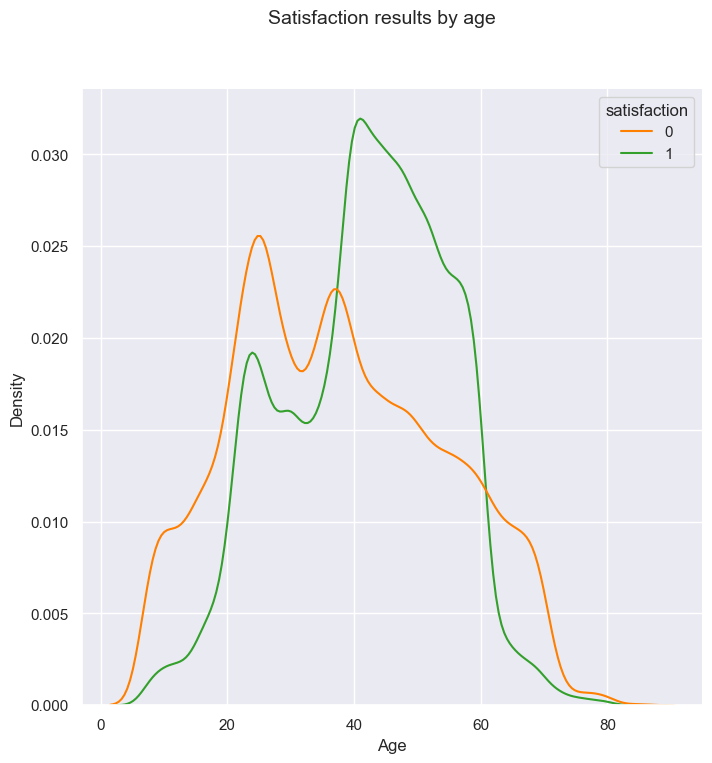

In [172]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=df,x='Age',hue='satisfaction',common_norm=False,palette='Paired_r')
plt.suptitle("Satisfaction results by age",fontsize=14)
sns.despine(top=True, right=True,left=False,bottom=False)
plt.show()

#### <font color = yellow>f.) Satisfaction Vs Flight Distance

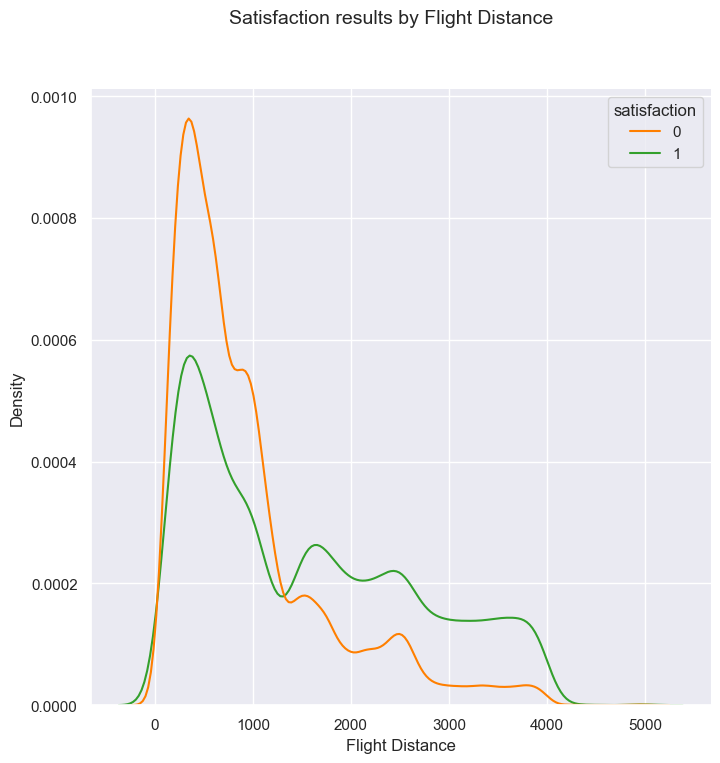

In [171]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=df,x='Flight Distance',hue='satisfaction',common_norm=False,palette='Paired_r')
plt.suptitle("Satisfaction results by Flight Distance",fontsize=14)
sns.despine(top=True, right=True,left=False,bottom=False)
plt.show()

#### <font color = yellow>g.) Satisfaction Vs Ease of Online Booking

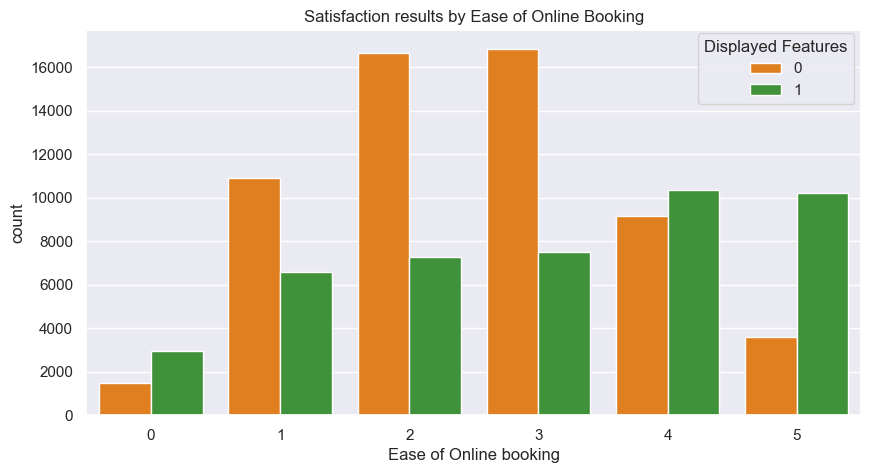

In [176]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Ease of Online booking", data =df, hue ="satisfaction",palette ="Paired_r")
plt.title("Satisfaction results by Ease of Online Booking")
plt.legend(loc='center right', bbox_to_anchor=(1, 0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>h.) Satisfaction Vs Inflight wifi service

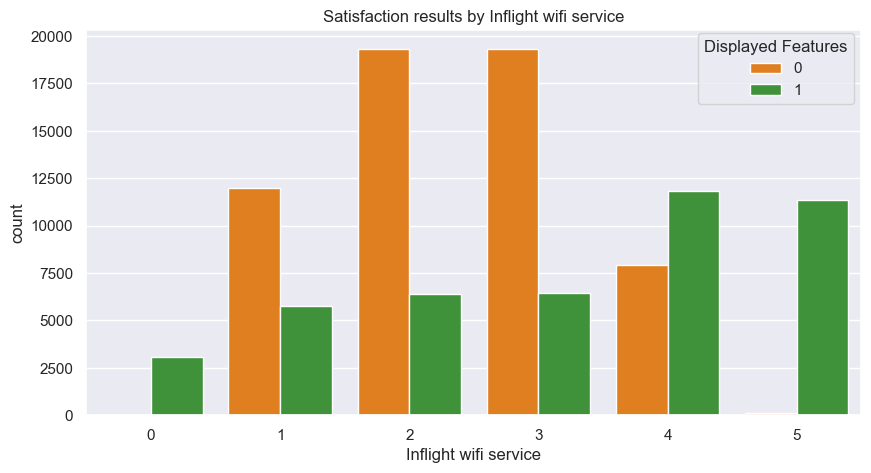

In [158]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Inflight wifi service", data =df, hue ="satisfaction",palette ="Paired_r" )
plt.title("Satisfaction results by Inflight wifi service")
plt.legend(loc='center right', bbox_to_anchor=(1, 0.9),  title = "Displayed Features")
plt.show()

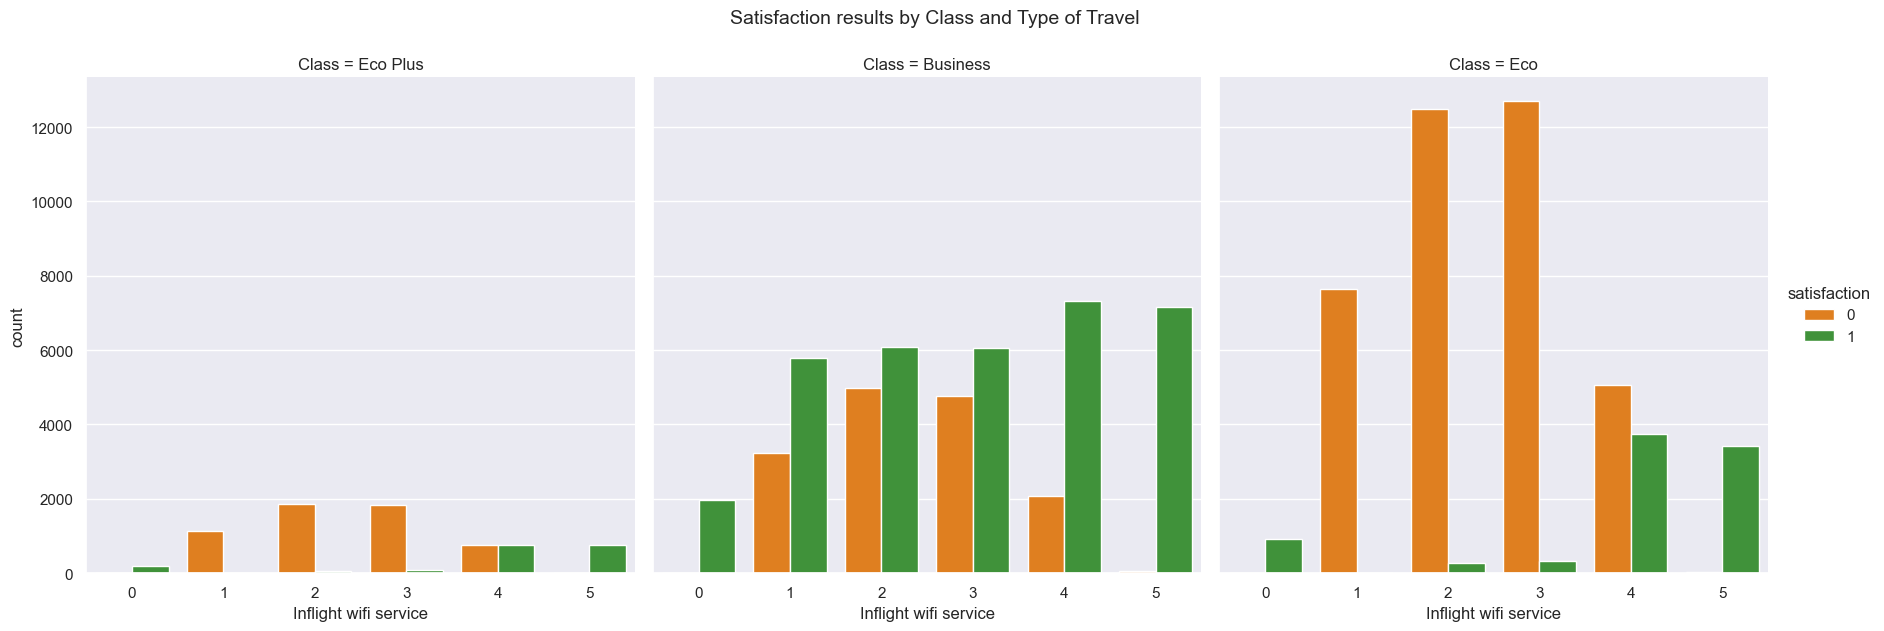

In [159]:
sns.catplot( x ="Inflight wifi service", hue ="satisfaction", kind = "count", col = "Class",data = df ,palette ="Paired_r", height = 6)
plt.suptitle("Satisfaction results by Class and Type of Travel", y = 1.05, fontsize= 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

#### <font color = yellow>i.) Satisfaction Vs Departure/Arrival Time Convenient

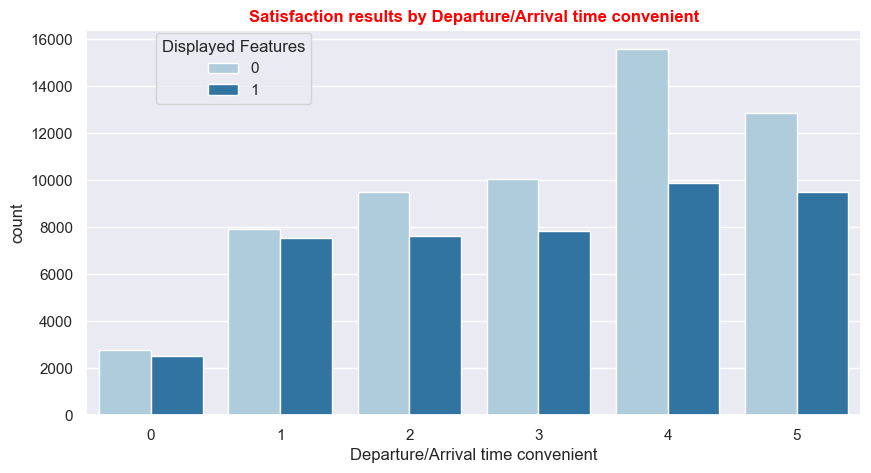

In [160]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Departure/Arrival time convenient", data =df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Departure/Arrival time convenient",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>j.) Satisfaction Vs Gate location

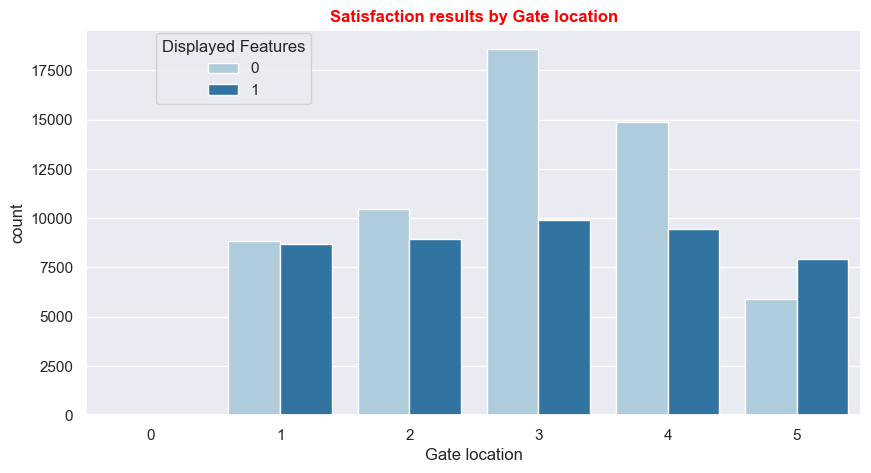

In [177]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Gate location", data =df, hue ="satisfaction",palette ="Paired")
plt.title("Satisfaction results by Gate location",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>k.) Satisfaction Vs Food and drink

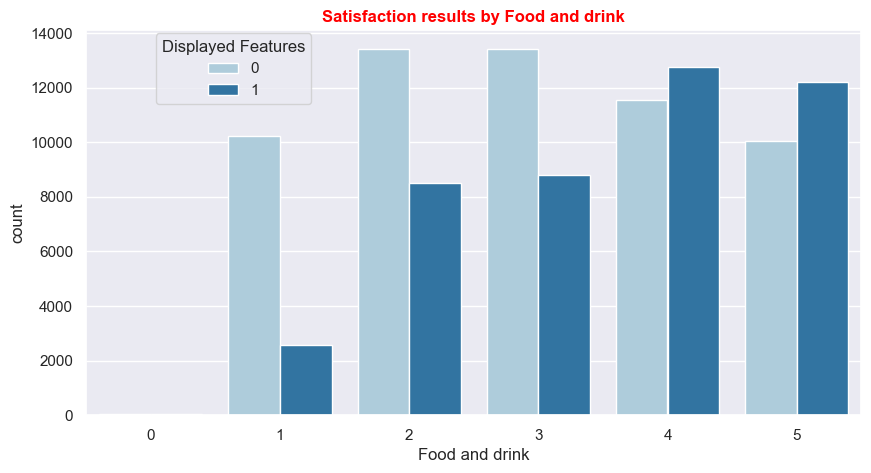

In [162]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Food and drink", data =df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Food and drink",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>L.) Satisfaction Vs Seat comfort

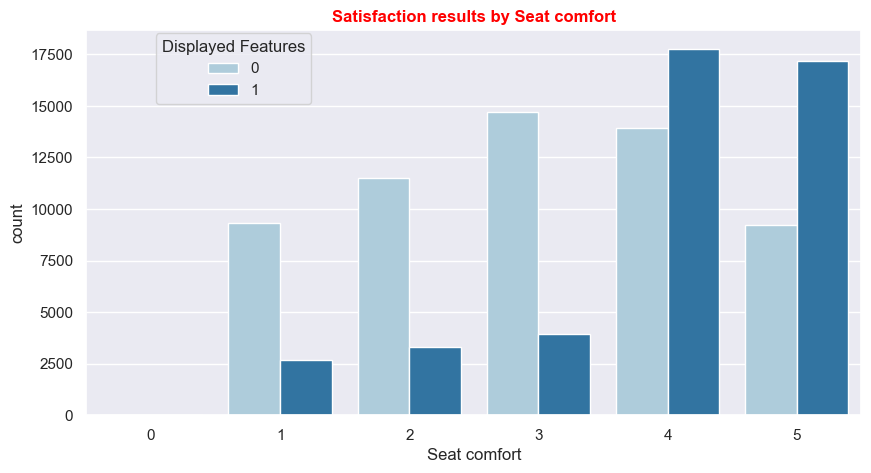

In [163]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Seat comfort", data =df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Seat comfort",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>m.) Satisfaction Vs Inflight entertainment

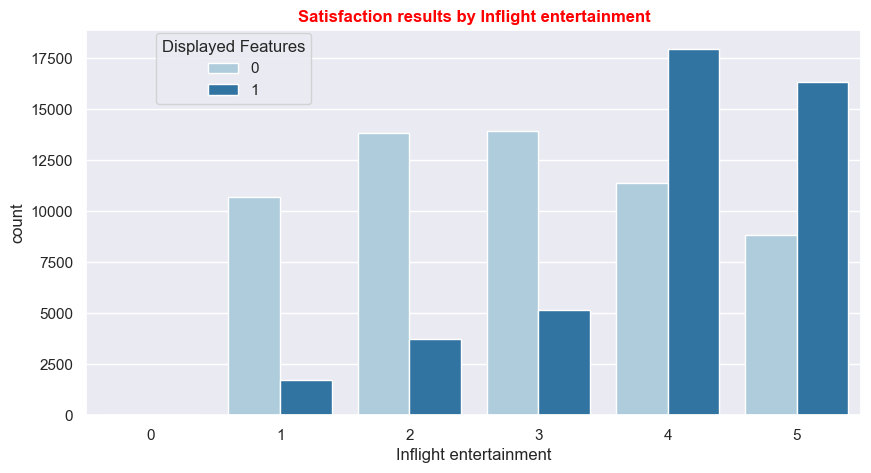

In [164]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Inflight entertainment", data =df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Inflight entertainment",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>n.) Satisfaction Vs On-board service

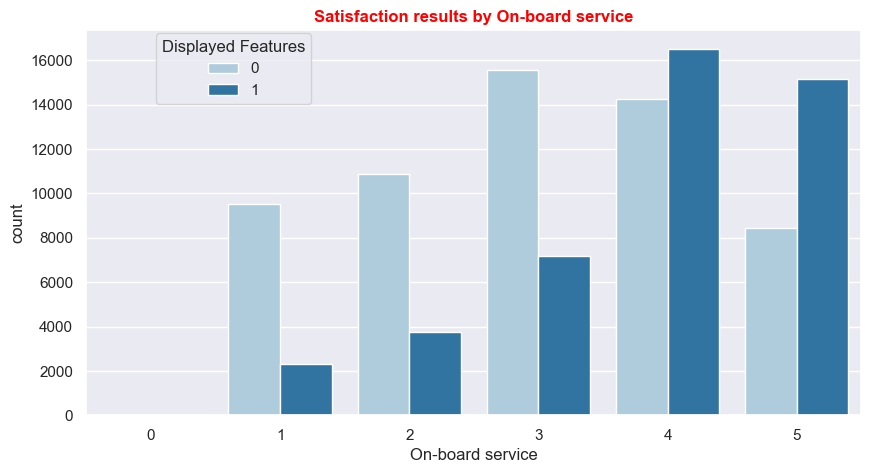

In [165]:
plt.figure(figsize = (10,5))
sns.countplot(x ="On-board service", data =df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by On-board service",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>o.) Satisfaction Vs Leg room service

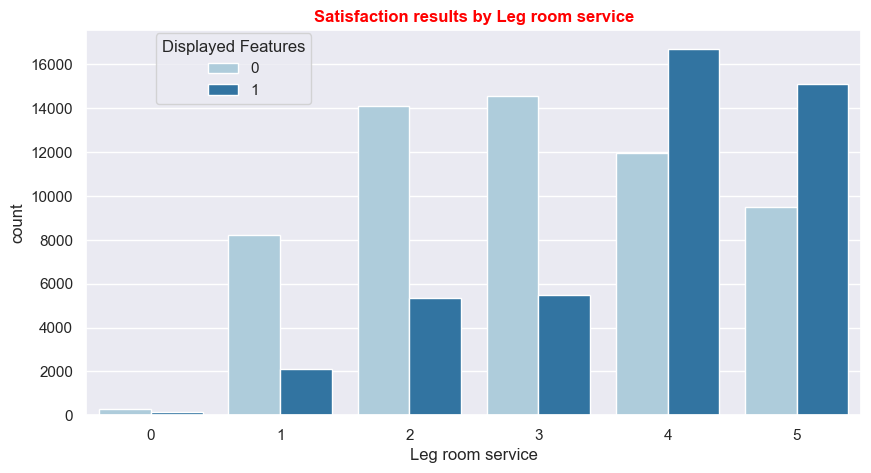

In [166]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Leg room service", data =df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Leg room service",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>p.) Satisfaction Vs Departure/Arrival Time Convenient

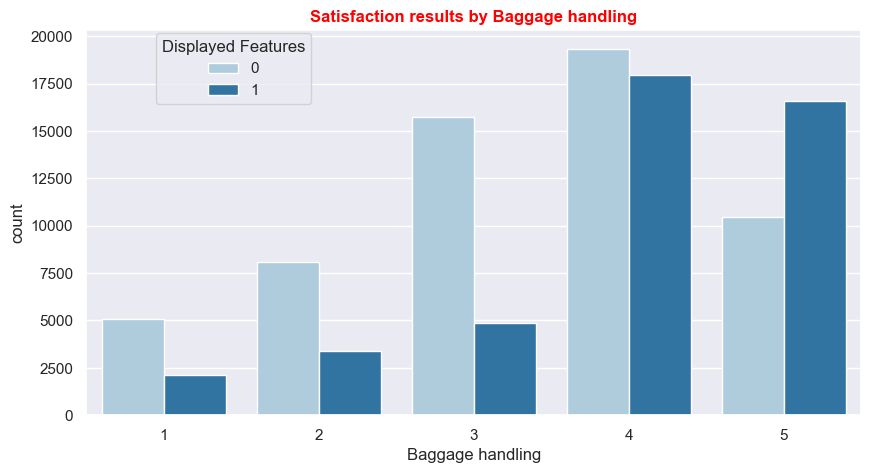

In [167]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Baggage handling", data =df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Baggage handling",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>q.) Satisfaction Vs Checkin service

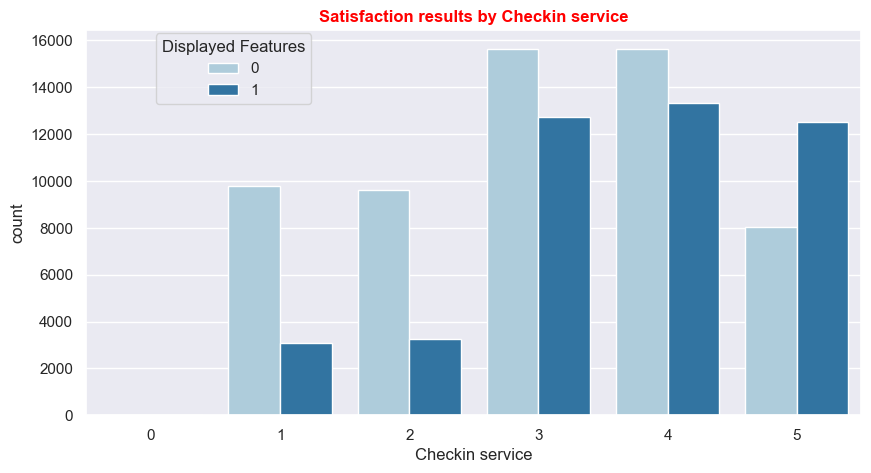

In [168]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Checkin service", data =df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Checkin service",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>r.) Satisfaction Vs Inflight service

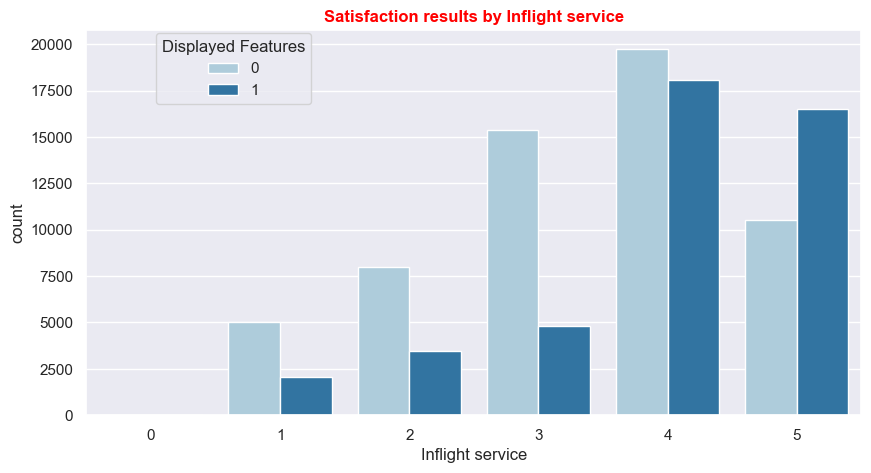

In [169]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Inflight service", data =df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Inflight service",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = yellow>s.) Satisfaction Vs Cleanliness

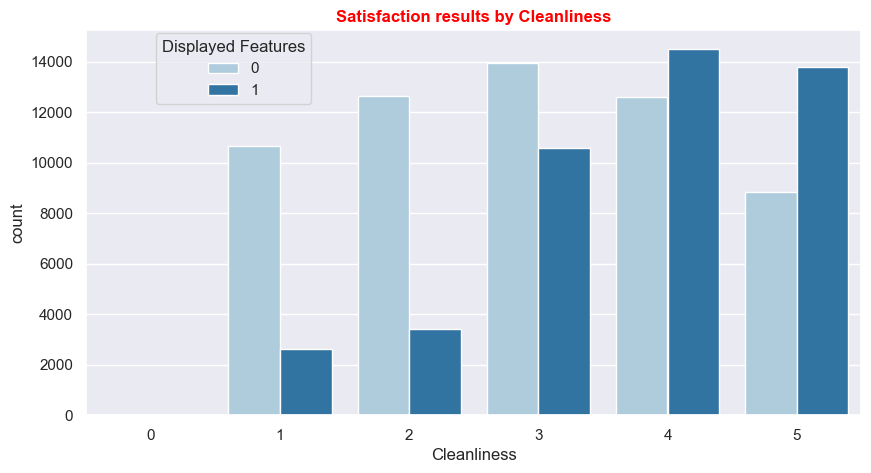

In [170]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Cleanliness", data =df, hue ="satisfaction",palette ="Paired" )
plt.title("Satisfaction results by Cleanliness",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.3,0.9),  title = "Displayed Features")
plt.show()

#### <font color = green|><b>4.) Check relationship among all of regressors

In [188]:
correlation_table = df.corr()
correlation_table

C:\Users\LH\AppData\Local\Temp\ipykernel_12488\2748155646.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = df.corr()


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,0.022929,0.095184,-0.021338,-0.001714,0.014119,-0.000427,0.001254,0.055394,0.053091,0.002592,0.055255,0.044459,0.075134,0.079346,0.079468,0.025313,-0.019321,-0.037254,0.013680
Age,0.022929,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147,0.137040
Flight Distance,0.095184,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426,0.298915
Inflight wifi service,-0.021338,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095,0.284163
Departure/Arrival time convenient,-0.001714,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864,-0.051718
Ease of Online booking,0.014119,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984,0.171507
Gate location,-0.000427,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143,0.000449
Food and drink,0.001254,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,-0.029983,-0.032524,0.209659
Online boarding,0.055394,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.018515,-0.021949,0.503447
Seat comfort,0.053091,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,-0.027323,-0.029900,0.349112


In [190]:
correlation_table1 = df[['Age', 'Flight Distance', 'Inflight wifi service',
                        'Departure/Arrival time convenient', 'Ease of Online booking'
                        ,'Departure Delay in Minutes','Arrival Delay in Minutes']].corr()
correlation_table1

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099838,0.017470,0.038038,0.024461,-0.010150,-0.012147
Flight Distance,0.099838,1.000000,0.007050,-0.019908,0.065697,0.001906,-0.002426
Inflight wifi service,0.017470,0.007050,1.000000,0.343758,0.715848,-0.017451,-0.019095
Departure/Arrival time convenient,0.038038,-0.019908,0.343758,1.000000,0.437021,0.000791,-0.000864
Ease of Online booking,0.024461,0.065697,0.715848,0.437021,1.000000,-0.006292,-0.007984
Departure Delay in Minutes,-0.010150,0.001906,-0.017451,0.000791,-0.006292,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,-0.019095,-0.000864,-0.007984,0.965481,1.000000


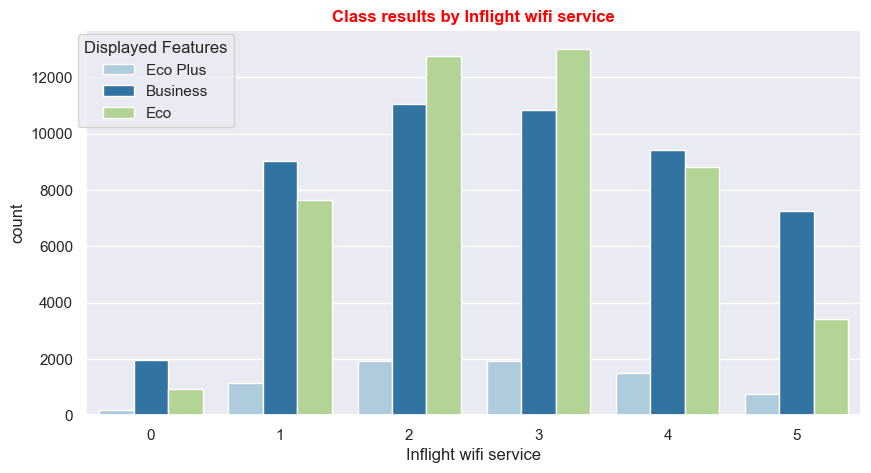

In [191]:
plt.figure(figsize = (10,5))
sns.countplot(x ="Inflight wifi service", data =df, hue ="Class",palette ="Paired" )
plt.title("Class results by Inflight wifi service",weight='bold',color='red')
plt.legend(loc='center right', bbox_to_anchor=(0.2,0.869),  title = "Displayed Features")
plt.show()

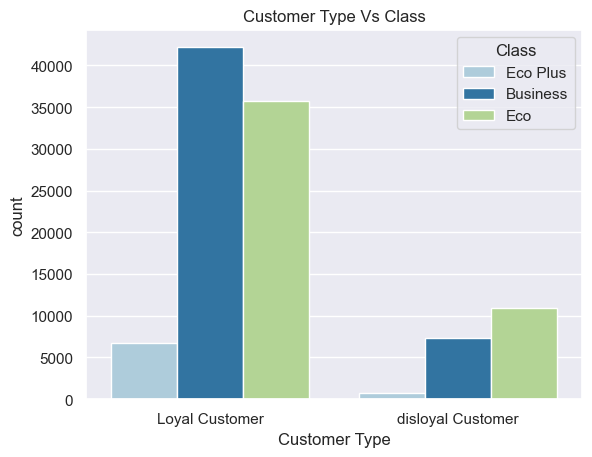

In [194]:
sns.countplot(x = 'Customer Type',  data = df, hue="Class",palette ="Paired")
plt.title('Customer Type Vs Class')
plt.show()

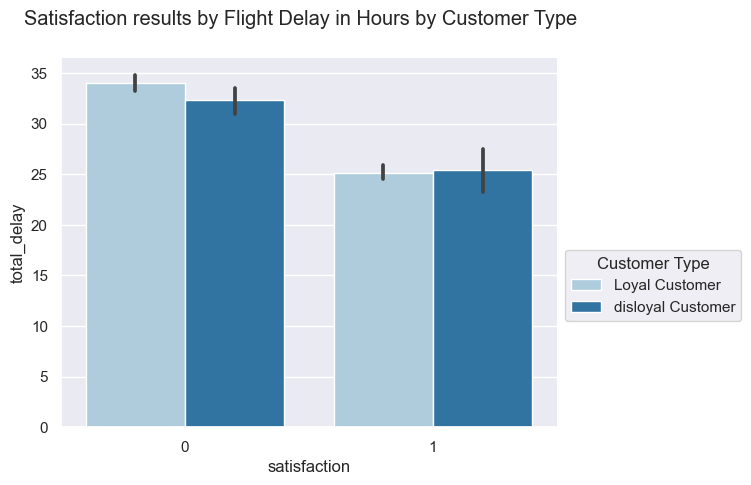

In [195]:
#Converting arrival and departure delay from minutes to hours for better interpretation.
df["Departure_delay_hr"] = round(df["Departure Delay in Minutes"]/60,1)
df["Arrival_delay_hr"] = round(df["Arrival Delay in Minutes"]/60,1).fillna(0)

delay = df[["Departure_delay_hr","Arrival_delay_hr"]]
df['total_delay']= df['Arrival Delay in Minutes']+ df["Departure Delay in Minutes"]
sns.barplot(x = 'satisfaction',  data = df,y="total_delay", hue="Customer Type",palette ="Paired")
plt.suptitle("Satisfaction results by Flight Delay in Hours by Customer Type")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "Customer Type")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

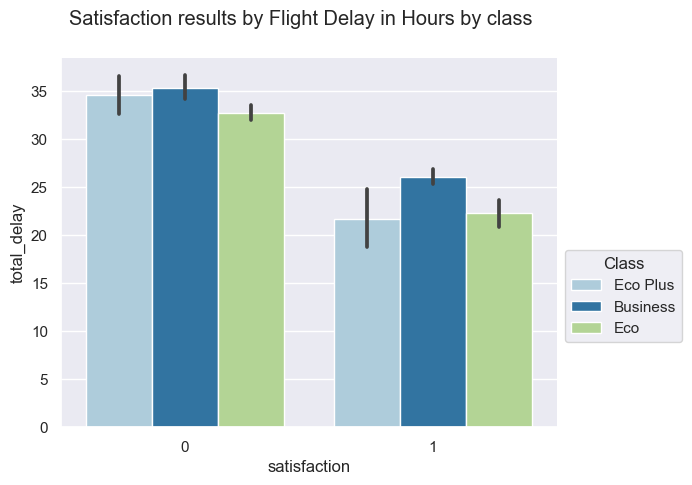

In [196]:
sns.barplot(x = 'satisfaction',  data = df,y="total_delay", hue="Class",palette ="Paired")
plt.suptitle("Satisfaction results by Flight Delay in Hours by class")
plt.legend(loc='best', bbox_to_anchor=(1, 0.5),  title = "Class")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

#### <font color = green|><b>5.) Identify outlier

In [197]:
# Understanding the content of all unique values
df.apply(lambda col: col.unique())

id                                   [70172, 5047, 110028, 24026, 119299, 111157, 8...
Gender                                                                  [Male, Female]
Customer Type                                      [Loyal Customer, disloyal Customer]
Age                                  [13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3...
Type of Travel                                      [Personal Travel, Business travel]
Class                                                        [Eco Plus, Business, Eco]
Flight Distance                      [460, 235, 1142, 562, 214, 1180, 1276, 2035, 8...
Inflight wifi service                                               [3, 2, 4, 1, 5, 0]
Departure/Arrival time convenient                                   [4, 2, 5, 3, 1, 0]
Ease of Online booking                                              [3, 2, 5, 4, 1, 0]
Gate location                                                       [1, 3, 2, 5, 4, 0]
Food and drink                             

In [199]:
def detect_outlier(data_set):
    outlier_lst = []
    q1 = data_set.quantile(0.25)
    q3 = data_set.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    upper_outliers_index = data_set[data_set > upper_bound].index.tolist()
    lower_outliers_index = data_set[data_set < lower_bound].index.tolist()
    
    upper_outliers = data_set[data_set > upper_bound].tolist()
    lower_outliers = data_set[data_set < lower_bound]
    
    print(f'Upper bound: {upper_bound}')
    print(f'Lower bound: {lower_bound}')
    
    print()
    print("*" * 120)
    print()
    
    print(f'Upper Outliers value: ', upper_outliers)
    
    print()
    print("*" * 120)
    print()
    
    print(f'Upper Outliers Index: ', upper_outliers_index)
    
print(detect_outlier(df['Flight Distance']))

Upper bound: 3736.5
Lower bound: -1579.5

************************************************************************************************************************

Upper Outliers value:  [3960, 3747, 3854, 3753, 3995, 3946, 3991, 3767, 3744, 3979, 3764, 3960, 3969, 3802, 3807, 3967, 3954, 3993, 3885, 3895, 3944, 4243, 3902, 3972, 3746, 3839, 3857, 3979, 3857, 3988, 3743, 3964, 3931, 3873, 3911, 3858, 3934, 3802, 3936, 3749, 3805, 3825, 3859, 3829, 3851, 3842, 3777, 3776, 3942, 3866, 3870, 3877, 3861, 3803, 4963, 3874, 3828, 3848, 3796, 3755, 3889, 3890, 3784, 3929, 4983, 3990, 3877, 3934, 3869, 3818, 3802, 3840, 3782, 3750, 3946, 3951, 3749, 3893, 3986, 3980, 3939, 3994, 3824, 3847, 3950, 3761, 3816, 3898, 3848, 3953, 3931, 3807, 3859, 3876, 3771, 3873, 3824, 3744, 3816, 3923, 3822, 3889, 3919, 3761, 3834, 3974, 3758, 3752, 3983, 3777, 3904, 3942, 3858, 3825, 3844, 3904, 3890, 3839, 3922, 3913, 3833, 3901, 3990, 3770, 3951, 3801, 3768, 3856, 3938, 3943, 3820, 3994, 3850, 4243, 3886, 37

#### <font color = green|><b>5.) Check transformation on variables by applying Box-Cox transformation

The Box-Cox transformation is a commonly used technique for transforming non-normal data into a normal distribution. It is useful when dealing with data that violates the assumption of normality required by certain statistical models. The Box-Cox transformation is defined by the following equation:

where y is the original variable, λ is the transformation parameter, and y_transformed is the transformed variable. The parameter λ can take any real value, but commonly used values include -1 (reciprocal transformation), 0 (logarithmic transformation), and 0.5 (square root transformation).

To perform the Box-Cox transformation in Python, you can use the `boxcox()` function from the `scipy.stats` module. Here's an example:

```python
from scipy import stats

# Assuming your data is stored in a numpy array called 'data'
transformed_data, lambda_value = stats.boxcox(data)

# 'transformed_data' contains the transformed values
# 'lambda_value' contains the estimated optimal lambda parameter
```

The `boxcox()` function returns two values: the transformed data and the estimated lambda value. The transformed data will be a numpy array with the same shape as the input data. The lambda value indicates the estimated optimal transformation parameter that maximizes the log-likelihood function.

After applying the Box-Cox transformation, it's important to evaluate the normality of the transformed data using visual inspection or statistical tests. You can use techniques such as histograms, Q-Q plots, or the Shapiro-Wilk test to assess the normality of the transformed data.

Note that the Box-Cox transformation assumes that the data values are positive. If your data includes zero or negative values, you may need to add a constant to the data before applying the transformation.

Remember to adjust the code according to your specific data and requirements.

In [202]:
import numpy as np
from scipy.stats import boxcox

# Apply Box-Cox transformation to "Flight Distance"
transformed_flight_distance, lambda_flight_distance = boxcox(df['Flight Distance'])

# Print the lambda value
print("Lambda value for Flight Distance:", lambda_flight_distance)

# Update the "Flight Distance" column with the transformed values
df['Flight Distance'] = transformed_flight_distance
print(f"transformed flight distance = {transformed_flight_distance}")

Lambda value for Flight Distance: 0.935929352064392
transformed flight distance = [7.01637592 5.91804287 8.6179273  ... 9.67099652 8.37540039 9.3888613 ]
